# Working with DataFrames.jl v1.5.0

# Part 1

## Bogumił Kamiński

In this part of the tutorial we will use the *Airports2.csv* file that is available for download here: https://www.kaggle.com/flashgordon/usa-airport-dataset. Therefore before starting it please be sure to download it and and have it un-zipped in your working directory.

Our objective is to show selected features of v1.5.0 release of the DataFrames.jl package.

This tutorial is not meant to be a replacement of a documentation - it just shows some practical application examples. If you want to know all the details of the discussed functionalities please refer to docstrings of the functions we show.

As usual in Julia, for every project you should have *Project.toml* and *Manifest.toml* files that specify the dependencies. They are bundled with this file in a GitHub gist.

If you do not have much experience with project dependencies and want to understand more about managing them I recommend you to read https://bkamins.github.io/julialang/2020/05/18/project-workflow.html.

This tutorial was developed under Julia 1.9.0.

Before we start let us make sure that you have the right versions of packages installed.

The output of the command below should be:
```
  [6e4b80f9] BenchmarkTools v1.3.2
  [336ed68f] CSV v0.10.9
  [8be319e6] Chain v0.5.0
  [a93c6f00] DataFrames v1.5.0
  [7073ff75] IJulia v1.24.0
  [0f8b85d8] JSON3 v1.12.0
  [91a5bcdd] Plots v1.38.5
```

In [1]:
] status

Status `~/git/DataFrames-Showcase/Project.toml`
  [6e4b80f9] BenchmarkTools v1.3.2
  [336ed68f] CSV v0.10.9
  [8be319e6] Chain v0.5.0
  [a93c6f00] DataFrames v1.5.0
  [7073ff75] IJulia v1.24.0
  [0f8b85d8] JSON3 v1.12.0
⌃ [91a5bcdd] Plots v1.38.6
Info Packages marked with ⌃ have new versions available and may be upgradable.


We start with loading the required packages and reading in the CSV file to a `DataFrame`:

In [35]:
using BenchmarkTools
using CSV
using DataFrames
using Dates
using Chain
using Plots

In [3]:
df = CSV.read("Airports2.csv", DataFrame, missingstring="NA")

Row,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
,String3,String3,String31,String31,Int64,Int64,Int64,Int64,Date,Int64,Int64,Float64?,Float64?,Float64?,Float64?
1,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.141,-96.6708,missing,missing
2,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.1246,-123.212,44.2541,-121.15
3,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.1246,-123.212,44.2541,-121.15
4,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.1246,-123.212,44.2541,-121.15
5,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.3742,-122.873,44.2541,-121.15
6,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.3742,-122.873,44.2541,-121.15
7,MFR,RDM,"Medford, OR","Bend, OR",2,72,4,156,1990-01-01,147300,76034,42.3742,-122.873,44.2541,-121.15
8,MFR,RDM,"Medford, OR","Bend, OR",7,18,1,156,1990-09-01,147300,76034,42.3742,-122.873,44.2541,-121.15
9,MFR,RDM,"Medford, OR","Bend, OR",7,36,2,156,1990-11-01,147300,76034,42.3742,-122.873,44.2541,-121.15


Our data frame contains the following columns:

1. `:Origin_airport`: Three letter airport code of the origin airport
2. `:Destination_airport`: Three letter airport code of the destination airport
3. `:Origin_city`: Origin city name
4. `:Destination_city`: Destination city name
5. `:Passengers`: Number of passengers transported from origin to destination
6. `:Seats`: Number of seats available on flights from origin to destination
7. `:Flights`: Number of flights between origin and destination (multiple records for one month, many with flights > 1)
8. `:Distance`: Distance (to nearest mile) flown between origin and destination
9. `:Fly_date`: The date (yyyymm) of flight
10. `:Origin_population`: Origin city's population as reported by US Census
11. `:Destination_population`: Destination city's population as reported by US Census

Let us first investigate its metadata

In [4]:
size(df)

(3606803, 15)

In [5]:
nrow(df)

3606803

In [6]:
ncol(df)

15

In [7]:
names(df)

15-element Vector{String}:
 "Origin_airport"
 "Destination_airport"
 "Origin_city"
 "Destination_city"
 "Passengers"
 "Seats"
 "Flights"
 "Distance"
 "Fly_date"
 "Origin_population"
 "Destination_population"
 "Org_airport_lat"
 "Org_airport_long"
 "Dest_airport_lat"
 "Dest_airport_long"

In [8]:
propertynames(df)

15-element Vector{Symbol}:
 :Origin_airport
 :Destination_airport
 :Origin_city
 :Destination_city
 :Passengers
 :Seats
 :Flights
 :Distance
 :Fly_date
 :Origin_population
 :Destination_population
 :Org_airport_lat
 :Org_airport_long
 :Dest_airport_lat
 :Dest_airport_long

An important thing to note is that the `names` function returns a vector of `String`s and the `propertynames` function returns a vector of `Symbol`s.

In DataFrames.jl both strings and `Symbol`s can be used for column indexing.

Let us now get some summary statistics of our data set using the `describe` function:

In [9]:
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Any,Any,Int64,Type
1,Origin_airport,,1B1,,ZZV,0,String3
2,Destination_airport,,1B1,,ZZV,0,String3
3,Origin_city,,"Aberdeen, SD",,"Zanesville, OH",0,String31
4,Destination_city,,"Aberdeen, SD",,"Zanesville, OH",0,String31
5,Passengers,2688.91,0,1118.0,89597,0,Int64
6,Seats,4048.3,0,1998.0,147062,0,Int64
7,Flights,37.2289,0,25.0,1128,0,Int64
8,Distance,697.319,0,519.0,5095,0,Int64
9,Fly_date,,1990-01-01,2001-11-01,2009-12-01,0,Date


In particular note that CSV.jl correctly idenfitied `:Fly_date` column as being a `Date` type.

When we investigate the summary statistics we note that there are flights that potentially have `0` passengers, `0` seats, or `0` flights.

In practice if you get such data it is good to investigate it, as it shows some potential data quality issues.

So, let us investigate it:

In [10]:
@chain df begin
    select(:Passengers, :Seats, :Flights)
    mapcols(ByRow(>(0)), _)  # or: mapcols(ByRow( x -> x > 0 ), _ )
    groupby(:, sort=true)
    combine(nrow, proprow)
end

Row,Passengers,Seats,Flights,nrow,proprow
,Bool,Bool,Bool,Int64,Float64
1,false,false,false,11239,0.00311606
2,false,false,true,322787,0.0894939
3,false,true,false,94,2.60619e-5
4,false,true,true,51772,0.014354
5,true,false,false,7,1.94078e-6
6,true,false,true,3,8.31762e-7
7,true,true,false,56,1.55262e-5
8,true,true,true,3220845,0.892992


Before interpreting the results let us dissect the code:
1. `@chain` is a macro from Chain.jl package, that makes it easy to chain function calls and makes `_` a placeholder for a value returned by a function that was earlier in the chain (you can read about the details here: https://github.com/jkrumbiegel/Chain.jl). Often, we don't even need to placeholder `_` - particularly in a DataFrames.jl context, where we give the result of an operation *as first argument* to the next operation.
2. `select` creates a new data frame that keeps only three columns that we are interested in
3. the `mapcols` statement applies a function to all columns. In this case, use `ByRow(>(0))`, which is basically the function `>(0)` wrapped in the `ByRow` helper function - which applies a function *to each row*. Notice that we could also have written `ByRow( x -> x > 0 )` if we found that easier to read. This line will transform each column of our data frame to have the `Bool` element type (check the output above!). On each row and for each column we will have a value `true` if an entry is greater than `0` and `false` otherwise. In this way we are able to easily idenfity rows with `0` entries, as they are most interesting for us
4. `groupby` groups our data frame by all columns (indicated by the `:` selector) - i.e. we want to group this data by lumping together all the rows where `Passengers` is `true`, `Seats` is `true`, `Flights` is `true`, and so on. Finally we tell DataFrames.jl that the gorups should be sorted.
5. finally `combine` just counts the number and proportion of rows in each group

Now going to our results - some of entries can be explained, like `0` passenges, but some seats and some flights (I guess it means that just no one took some flight).

However cases like some passengers, but `0` seats and `0` flights are probably a mistake in data (we have 7 rows that have this combination of values).

Let us try to find these 7 rows in two ways:

In [11]:
filter(row -> row.Passengers > 0 && row.Seats == 0 && row.Flights == 0, df)

Row,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
,String3,String3,String31,String31,Int64,Int64,Int64,Int64,Date,Int64,Int64,Float64?,Float64?,Float64?,Float64?
1,ABR,PIR,"Aberdeen, SD","Pierre, SD",11,0,0,117,1997-11-01,39903,18289,45.4491,-98.4218,44.3827,-100.286
2,IAD,BKW,"Washington, DC","Beckley, WV",2,0,0,215,2002-12-01,10029142,78851,38.9445,-77.4558,37.7873,-81.1242
3,IAD,BKW,"Washington, DC","Beckley, WV",1,0,0,215,2003-02-01,10172752,78587,38.9445,-77.4558,37.7873,-81.1242
4,IAD,BKW,"Washington, DC","Beckley, WV",2,0,0,215,2003-03-01,10172752,78587,38.9445,-77.4558,37.7873,-81.1242
5,BOS,LAS,"Boston, MA","Las Vegas, NV",9,0,0,2381,1993-06-01,8260582,877917,42.3643,-71.0052,36.0801,-115.152
6,BKW,IAD,"Beckley, WV","Washington, DC",7,0,0,215,2002-12-01,78851,10029142,37.7873,-81.1242,38.9445,-77.4558
7,CMI,BMI,"Champaign, IL","Bloomington, IL",6,0,0,46,1997-11-01,201107,141699,40.0392,-88.2781,40.4771,-88.9159


In [12]:
subset(df, :Passengers => ByRow(>(0)), :Seats => ByRow(==(0)), :Flights  => ByRow(==(0)))

Row,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
,String3,String3,String31,String31,Int64,Int64,Int64,Int64,Date,Int64,Int64,Float64?,Float64?,Float64?,Float64?
1,ABR,PIR,"Aberdeen, SD","Pierre, SD",11,0,0,117,1997-11-01,39903,18289,45.4491,-98.4218,44.3827,-100.286
2,IAD,BKW,"Washington, DC","Beckley, WV",2,0,0,215,2002-12-01,10029142,78851,38.9445,-77.4558,37.7873,-81.1242
3,IAD,BKW,"Washington, DC","Beckley, WV",1,0,0,215,2003-02-01,10172752,78587,38.9445,-77.4558,37.7873,-81.1242
4,IAD,BKW,"Washington, DC","Beckley, WV",2,0,0,215,2003-03-01,10172752,78587,38.9445,-77.4558,37.7873,-81.1242
5,BOS,LAS,"Boston, MA","Las Vegas, NV",9,0,0,2381,1993-06-01,8260582,877917,42.3643,-71.0052,36.0801,-115.152
6,BKW,IAD,"Beckley, WV","Washington, DC",7,0,0,215,2002-12-01,78851,10029142,37.7873,-81.1242,38.9445,-77.4558
7,CMI,BMI,"Champaign, IL","Bloomington, IL",6,0,0,46,1997-11-01,201107,141699,40.0392,-88.2781,40.4771,-88.9159


Let us compare the timing of both options:

In [13]:
@time filter(row -> row.Passengers > 0 && row.Seats == 0 && row.Flights == 0, df);

  1.285620 seconds (18.31 M allocations: 293.122 MiB, 53.01% gc time, 4.19% compilation time)


In [14]:
@time subset(df, :Passengers => ByRow(>(0)), :Seats => ByRow(==(0)), :Flights  => ByRow(==(0)));

  0.006925 seconds (422 allocations: 10.776 MiB)


Now let us move to another analysis.

We want to get an information about the occupancy of each flight. It can be calculated as ratio of the number of passengers and number of seats time number of flights. The problem is that if there are `0` seats or flights we would be dividing by `0` and get a `NaN` result. We prefer to get a `missing` value in this case. Therefore first define a helper function:

In [15]:
function get_occupied(passengers, seats, flights)
    if seats == 0 || flights == 0
        return missing
    else
        return passengers / (seats * flights)
    end
end

get_occupied (generic function with 1 method)

and now we use it to add a new column to our data frame. Additionally we create three new columns:
1. `:ost`: state of the origin city
2. `:dst`: state of the destination city
3. `:year`: year of flight

In [16]:
df2 = transform(df,
                [:Passengers, :Seats, :Flights] => ByRow(get_occupied) => :occupied,
                [:Origin_city, :Destination_city] .=> ByRow(x -> last(x, 2)) .=> [:ost, :dst],
                :Fly_date => ByRow(year) => :year)

Row,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,occupied,ost,dst,year
,String3,String3,String31,String31,Int64,Int64,Int64,Int64,Date,Int64,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,String31,String31,Int64
1,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.141,-96.6708,missing,missing,0.7,KS,IA,2008
2,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.1246,-123.212,44.2541,-121.15,0.00470615,OR,OR,1990
3,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.1246,-123.212,44.2541,-121.15,0.0135426,OR,OR,1990
4,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.1246,-123.212,44.2541,-121.15,0.0381944,OR,OR,1990
5,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.3742,-122.873,44.2541,-121.15,0.0,OR,OR,1990
6,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,147300,76034,42.3742,-122.873,44.2541,-121.15,0.611111,OR,OR,1990
7,MFR,RDM,"Medford, OR","Bend, OR",2,72,4,156,1990-01-01,147300,76034,42.3742,-122.873,44.2541,-121.15,0.00694444,OR,OR,1990
8,MFR,RDM,"Medford, OR","Bend, OR",7,18,1,156,1990-09-01,147300,76034,42.3742,-122.873,44.2541,-121.15,0.388889,OR,OR,1990
9,MFR,RDM,"Medford, OR","Bend, OR",7,36,2,156,1990-11-01,147300,76034,42.3742,-122.873,44.2541,-121.15,0.0972222,OR,OR,1990


Notice again that in the computation we used `ByRow` wrapper that instructs DataFrames.jl to apply the function for each row of the passed data.

It is instructive to disect this pipeline step by step. When we said

```julia
[:Passengers, :Seats, :Flights] => ByRow(get_occupied) => :occupied
```

remember that the `get_occupied` function required 3 input arguments. The initial `[:Passengers, :Seats, :Flights]` selector makes sure we pass the required 3 columns, and in the correct order. Finally, having `ByRow(get_occupied) => :occupied` means that our function returns a single output *vector*, and we supply a single name, `:occupied` for it.

In the next statement, we wrote 

```julia
[:Origin_city, :Destination_city] .=> ByRow(x -> last(x, 2)) .=> [:ost, :dst]
```

which looks similar, but has a crucial difference: the `Pair` operator `=>` is being *broadcasted* this time (note the `.` in front of the `=>`)! In simple words, here we will apply our transformation *to each input column*, outputting as well 2 columns (ensured by the second `.=>`). One noteworthy feature of DataFrames.jl is that the so-written components of a data pipeline are valid julia code (and *not* part of a package-specific DSL). For instance, you can evaluate this line in the REPL to investigate the transformation we are building in this step:

```julia
julia> [:Origin_city, :Destination_city] .=> ByRow(x -> last(x, 2)) .=> [:ost, :dst]
2-element Vector{Pair{Symbol, Pair{ByRow{var"#5#6"}, Symbol}}}:
      :Origin_city => (ByRow{var"#5#6"}(var"#5#6"()) => :ost)
 :Destination_city => (ByRow{var"#5#6"}(var"#5#6"()) => :dst)

```

If the central part (the anonymous function with `ByRow` etc) looks confusing, consider this example, which is the essence of what's going on:

```julia
julia> [:x1, :x2] .=> ["op1", "op2"]
2-element Vector{Pair{Symbol, String}}:
 :x1 => "op1"
 :x2 => "op2"
```

This also illustrates that the comma in the output column names array is of crucial importance (i.e. it should be `[:ost, :dst]` and not `[:ost :dst]`). The reason being simply that the julia broadcasting rules would expand the expression into the second dimension, i.e. 

```julia
julia> [:x1, :x2] .=> ["op1" "op2"]
2×2 Matrix{Pair{Symbol, String}}:
 :x1=>"op1"  :x1=>"op2"
 :x2=>"op1"  :x2=>"op2"
```

which is not what we want in this instance.

Here is an alternative way to compute `:occupied` without using `ByRow`, but instead using standard broadcasting:

In [17]:
get_occupied2(passengers, seats, flights) =
    @. ifelse((seats == 0) || (flights == 0), missing, passengers / (seats * flights))

get_occupied2 (generic function with 1 method)

In [18]:
df2′ = select(df, [:Passengers, :Seats, :Flights] => get_occupied2 => :occupied);

First we check if both methods produced the same result:

In [19]:
isequal(df2.occupied, df2′.occupied)

true

The second thing we can do is compare the performance of both options:

In [20]:
@benchmark select($df, [:Passengers, :Seats, :Flights] => ByRow(get_occupied) => :occupied)

BenchmarkTools.Trial: 47 samples with 1 evaluation.
 Range (min … max):  105.917 ms … 117.231 ms  ┊ GC (min … max): 90.60% … 91.39%
 Time  (median):     106.959 ms               ┊ GC (median):    90.80%
 Time  (mean ± σ):   107.677 ms ±   2.409 ms  ┊ GC (mean ± σ):  90.87% ±  0.22%

      ██▅                                                        
  ▃▁▁████▅▃▁▃▃▁▁▁▁▁▁▁▁▁▁▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▃▁▁▁▁▃ ▁
  106 ms           Histogram: frequency by time          117 ms <

 Memory estimate: 58.50 MiB, allocs estimate: 406.

In [21]:
@benchmark select($df, [:Passengers, :Seats, :Flights] => get_occupied2 => :occupied)

BenchmarkTools.Trial: 44 samples with 1 evaluation.
 Range (min … max):  111.299 ms … 124.473 ms  ┊ GC (min … max): 89.59% … 90.38%
 Time  (median):     112.845 ms               ┊ GC (median):    89.47%
 Time  (mean ± σ):   115.111 ms ±   4.098 ms  ┊ GC (mean ± σ):  89.67% ±  0.33%

    ▂▆█                                                          
  █▁███▄▁▆▆▄▄▁▁▄▁▁▁▁▄▁▄▁▄▁▁▁▁▄▁▁▁▁▆▁▁▁▁▁▁▁▁▆▁▄▁▄▁▁▆▄▁▄▁▁▁▁▄▁▁▁▄ ▁
  111 ms           Histogram: frequency by time          124 ms <

 Memory estimate: 58.48 MiB, allocs estimate: 158.

As you can see DataFrames.jl does a decent job in this case - the option with `ByRow` is a tad faster than the broadcasting approach.

A crucial value of piping with `@chain` is that it composes also with functions outside of DataFrames.jl package.

Here is a simple example in which we will plot the total number of passengers that flew by year:

In [22]:
@chain df2 begin
    groupby(:year, sort=true)
    combine(:Passengers => sum)
    plot(_.year, _.Passengers_sum ./ 10^6, legend=nothing,
         xlab="year", ylab="passengers (in millions)")
end

LoadError: UndefVarError: `plot` not defined

I particular note that `_` notation from Chain.jl package allows you to write any valid code you could use on the passed value. In our case `plot` is passed a `DataFrame`, so we e.g. write `_.year` to get a `:year` column from it.

In the following example we will want to find pairs of origin-destination states that have the highest occupancy:

In [23]:
df3 = @chain df2 begin
    groupby([:ost, :dst])
    combine(:occupied => mean∘skipmissing => :occupied, :Passengers => sum)
    filter!(:occupied => isfinite, _)
    sort!(:occupied, rev=true)
end

Row,ost,dst,occupied,Passengers_sum
,String31,String31,Float64,Int64
1,NE,AK,1.0,180
2,MD,ID,1.0,150
3,ID,AR,1.0,124
4,ID,MS,1.0,181
5,ND,RI,1.0,50
6,WY,NY,0.991935,123
7,OR,RI,0.991935,123
8,WV,NE,0.984615,176
9,KS,ID,0.983871,122


In the above code note two things: we use `filter!` and `sort!` functions to process the data frame returned by `combine` in place (which reduces the number of allocations we make).

Additionally note that when we aggregate `:occupied` column in `combine` using `mean∘skipmissing` then for some origin-destination state combinations we get zero observations, which produce `NaN`, so we filter them out using `isfinite` predicate.

Just to make sure what happens when we apply `mean∘skipmissing` to a vector containing only missing values consider the following simple example:

In [24]:
@chain DataFrame(g=[1,1,2,2], v=[1,2,missing, missing]) begin
    groupby(:g)
    combine(:v => mean∘skipmissing)
end

Row,g,v_mean_skipmissing
,Int64,Float64
1,1,1.5
2,2,NaN


As a final example let us consider the following case. Assume that you want to query the `df3` data frame by `:ost` and `:dst` columns very often.

The simplest way to do it is to use `subset` as we have already discussed:

In [25]:
subset(df3, :ost => ByRow(==("NE")), :dst => ByRow(==("AK")))

Row,ost,dst,occupied,Passengers_sum
,String31,String31,Float64,Int64
1,NE,AK,1.0,180


Now let us use a bit different technique. We `groupby` the `df3` data frame first:

In [26]:
gdf3 = groupby(df3, [:ost, :dst])

Row,ost,dst,occupied,Passengers_sum
,String31,String31,Float64,Int64
1,NE,AK,1.0,180
Row,ost,dst,occupied,Passengers_sum
,String31,String31,Float64,Int64
1,AK,VA,0.0,0


Now we can easiliy query it by group values (here we show such indexing by `Tuple` or `NamedTuple`):

In [27]:
gdf3[("NE", "AK")]

Row,ost,dst,occupied,Passengers_sum
,String31,String31,Float64,Int64
1,NE,AK,1.0,180


In [28]:
gdf3[(ost="NE", dst="AK")]

Row,ost,dst,occupied,Passengers_sum
,String31,String31,Float64,Int64
1,NE,AK,1.0,180


Note that you can use `keys` on `GroupedDataFrame`:

In [29]:
keys(gdf3)

2369-element DataFrames.GroupKeys{GroupedDataFrame{DataFrame}}:
 GroupKey: (ost = String31("NE"), dst = String31("AK"))
 GroupKey: (ost = String31("MD"), dst = String31("ID"))
 GroupKey: (ost = String31("ID"), dst = String31("AR"))
 GroupKey: (ost = String31("ID"), dst = String31("MS"))
 GroupKey: (ost = String31("ND"), dst = String31("RI"))
 GroupKey: (ost = String31("WY"), dst = String31("NY"))
 GroupKey: (ost = String31("OR"), dst = String31("RI"))
 GroupKey: (ost = String31("WV"), dst = String31("NE"))
 GroupKey: (ost = String31("KS"), dst = String31("ID"))
 GroupKey: (ost = String31("AK"), dst = String31("TN"))
 GroupKey: (ost = String31("NM"), dst = String31("KY"))
 GroupKey: (ost = String31("HI"), dst = String31("NE"))
 GroupKey: (ost = String31("PA"), dst = String31("HI"))
 ⋮
 GroupKey: (ost = String31("CA"), dst = String31("WV"))
 GroupKey: (ost = String31("SD"), dst = String31("WV"))
 GroupKey: (ost = String31("ND"), dst = String31("WV"))
 GroupKey: (ost = String31("AK"), dst

In this way we got only the origin-destination state combinations that are actually present in our `GroupedDataFrame`.

The ability to query a `GroupedDataFrame` by grouping columns fast makes it a very useful way to add an index to a data frame.

It is also fast

In [30]:
@benchmark subset(df3, :ost => ByRow(==("NE")), :dst => ByRow(==("AK")))

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):   68.083 μs … 109.170 ms  ┊ GC (min … max):  0.00% … 99.85%
 Time  (median):      69.958 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   133.015 μs ±   2.555 ms  ┊ GC (mean ± σ):  47.01% ±  2.45%

        ▁▅▄█▅█▇▃▅▁▃                                              
  ▂▂▂▄▄████████████▇█▆▆▄▄▄▄▃▃▄▃▄▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂ ▄
  68.1 μs          Histogram: frequency by time         77.1 μs <

 Memory estimate: 28.91 KiB, allocs estimate: 350.

In [31]:
@benchmark gdf3[("NE", "AK")]

BenchmarkTools.Trial: 10000 samples with 182 evaluations.
 Range (min … max):  573.264 ns … 587.990 μs  ┊ GC (min … max):  0.00% … 99.85%
 Time  (median):     600.275 ns               ┊ GC (median):     0.00%
 Time  (mean ± σ):     1.288 μs ±  19.813 μs  ┊ GC (mean ± σ):  53.28% ±  3.46%

                  ▃▄▆▆▄█▇█▆▄▅▇▆▄▂▁▁                              
  ▂▁▂▂▂▂▂▃▃▃▄▅▆▆████████████████████▇▆▇▅▅▅▄▄▃▄▃▃▃▃▃▂▂▂▃▂▂▂▂▂▂▂▂ ▅
  573 ns           Histogram: frequency by time          640 ns <

 Memory estimate: 304 bytes, allocs estimate: 12.

## Custom Transforms

* We have seen that with the `transform(d, :var1 => fun)` construct we can easily transform one or more columns.
* We have also seen the `ByRow` wrapper, which is a shorthand for broadcasting a scalar operation over an entire column.
* Some transformations are more involved, however. Imagine, we would like to answer the question 

> Which origin state had the largest share of transported passengers by year? Like, what percentage of passengers transported by air, where departing from which state?

1. Of course looking at absolute numbers (rather than shares) would inform us equally well here. The point is that in Economics we often work with *shares*, hence we want to know how to compute those.
2. A *share* is a number that you divide by a *(group) total*. So, here we will group by *year*, and within each year, we will count passengers departing from all airports, and we will compute the corresponding shares.

### Steps

1. aggregate passengers to (origin-)state-year level
2. for each year, compute total number of passengers, and compute according share for each state.


In [32]:
df4 = @chain df2 begin
    groupby([:ost, :year])
    combine(:Passengers => sum)
    groupby(:year)
    transform(:Passengers_sum => (x -> 100 * (x ./ sum(x))) => :passenger_share)
    sort(:year)
end;

In [33]:
df4

Row,ost,year,Passengers_sum,passenger_share
,String31,Int64,Int64,Float64
1,OR,1990,3423079,0.924146
2,WA,1990,7849573,2.11919
3,CA,1990,36295764,9.79896
4,PA,1990,15585194,4.20762
5,OH,1990,12016758,3.24423
6,MA,1990,8855285,2.39071
7,NY,1990,20384500,5.50331
8,GA,1990,21422086,5.78343
9,IL,1990,26672408,7.20089


Ok, let's filter the ones with a share above 2.5% and make a plot!

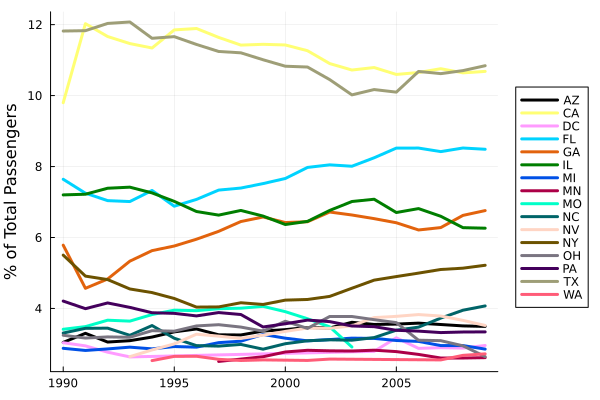

In [36]:
@chain df4 begin
    subset(:passenger_share => ByRow((>=)(2.5)))
    plot(_.year, _.passenger_share, group = _.ost, legend = :outerright, 
    color = reshape(Plots.distinguishable_colors(length(unique(_.ost))), 1, length(unique(_.ost))),
    lw = 3, ylab = "% of Total Passengers")
end

In [38]:
names(df2)

19-element Vector{String}:
 "Origin_airport"
 "Destination_airport"
 "Origin_city"
 "Destination_city"
 "Passengers"
 "Seats"
 "Flights"
 "Distance"
 "Fly_date"
 "Origin_population"
 "Destination_population"
 "Org_airport_lat"
 "Org_airport_long"
 "Dest_airport_lat"
 "Dest_airport_long"
 "occupied"
 "ost"
 "dst"
 "year"

In [39]:
select(df2, :Origin_population, :Destination_population, :Passengers, :Seats)

Row,Origin_population,Destination_population,Passengers,Seats
,Int64,Int64,Int64,Int64
1,122049,86219,21,30
2,284093,76034,41,396
3,284093,76034,88,342
4,284093,76034,11,72
5,147300,76034,0,18
6,147300,76034,11,18
7,147300,76034,2,72
8,147300,76034,7,18
9,147300,76034,7,36
